# Dashboard Visualization Mockup

## Sales Trend Plot

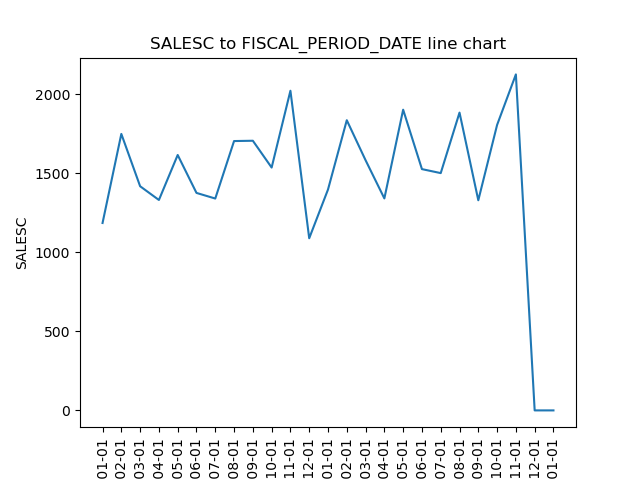

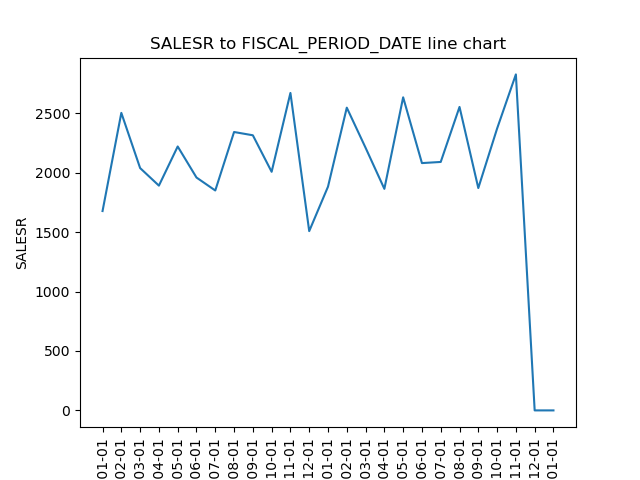

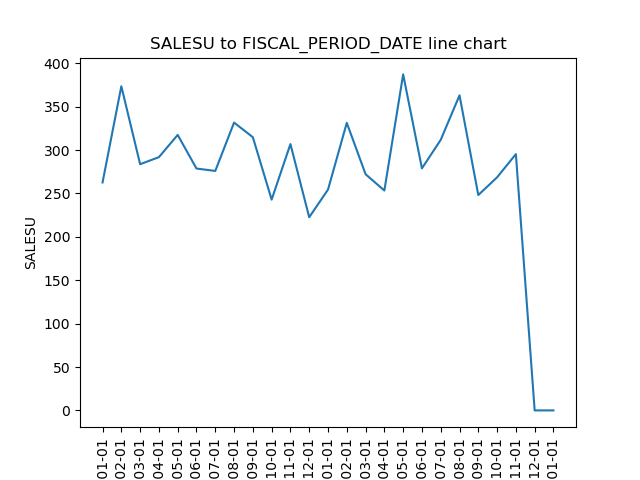

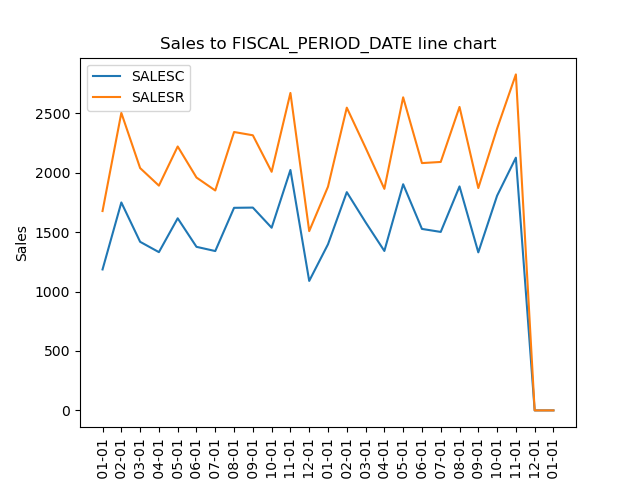

## Sales by Location

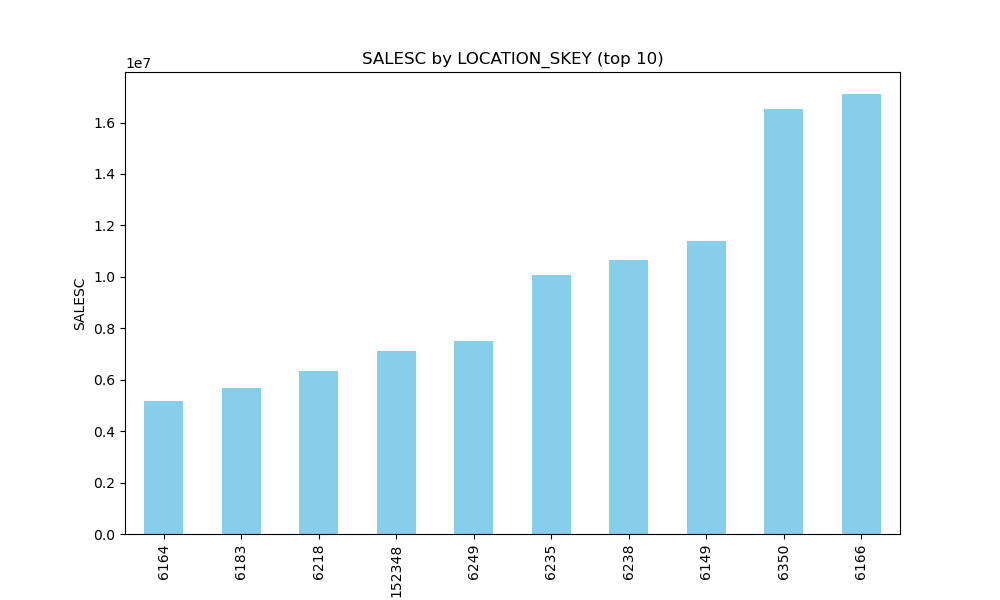

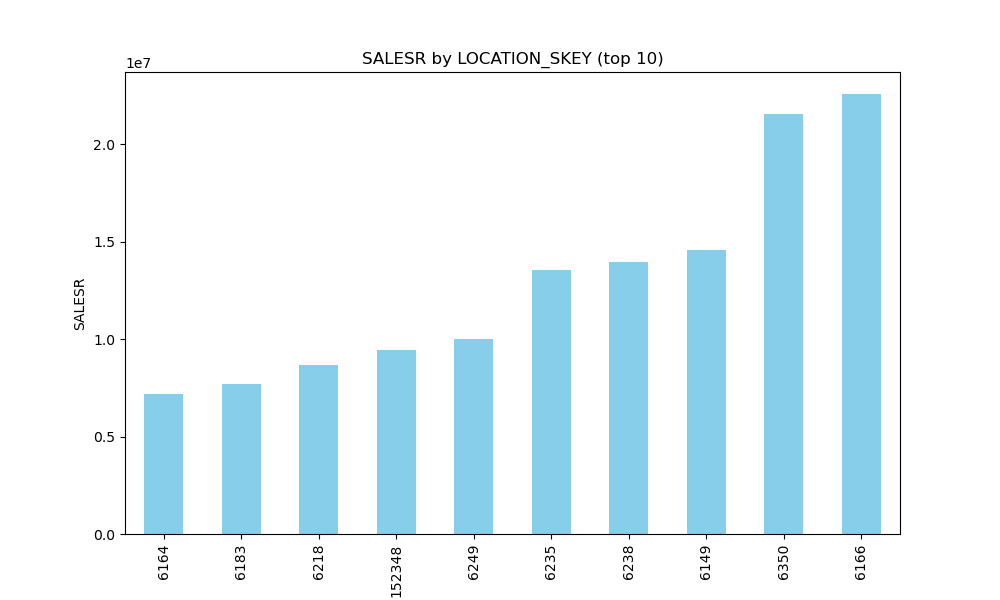

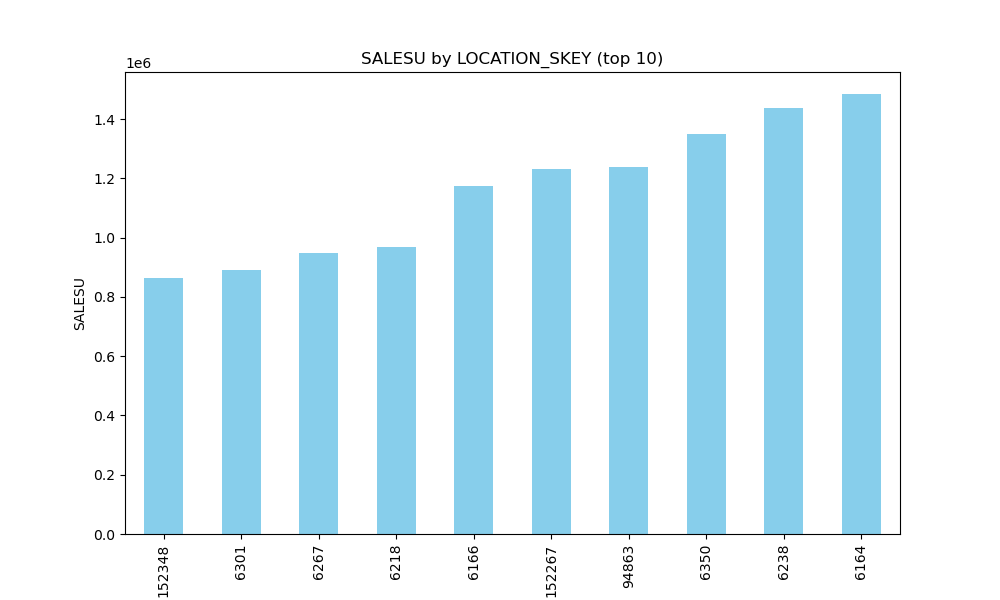

## Sales by Department

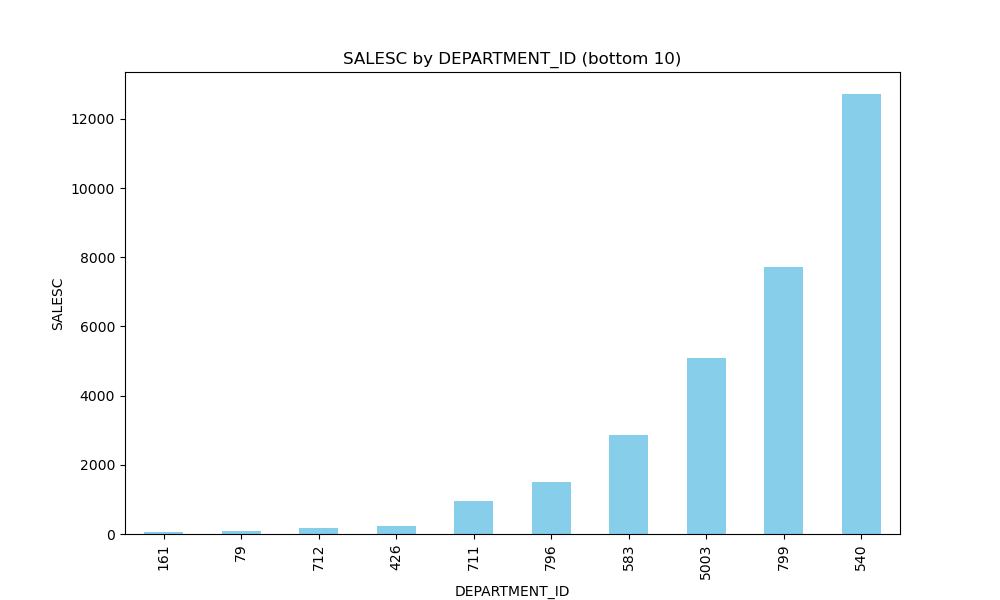

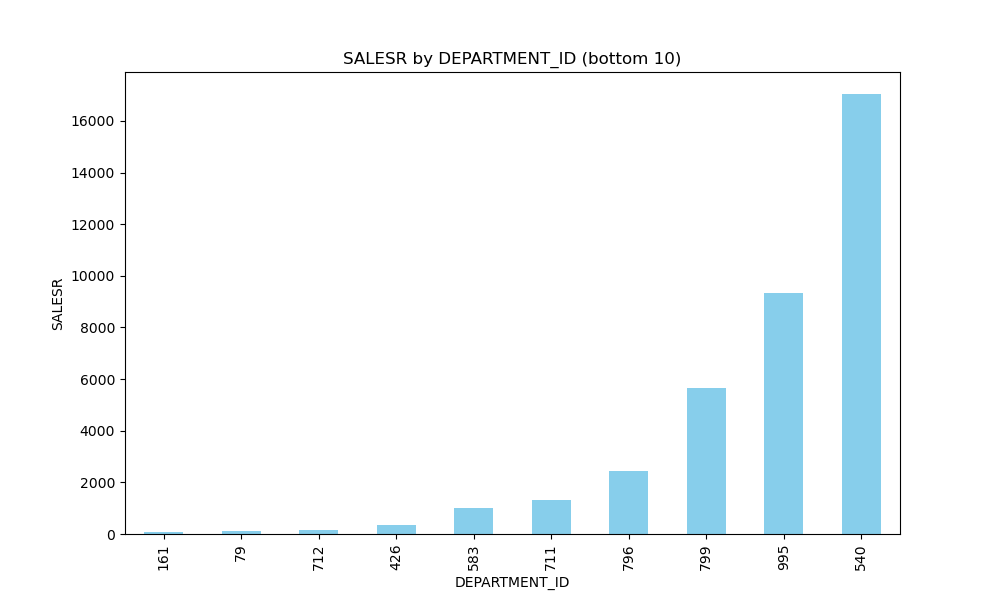

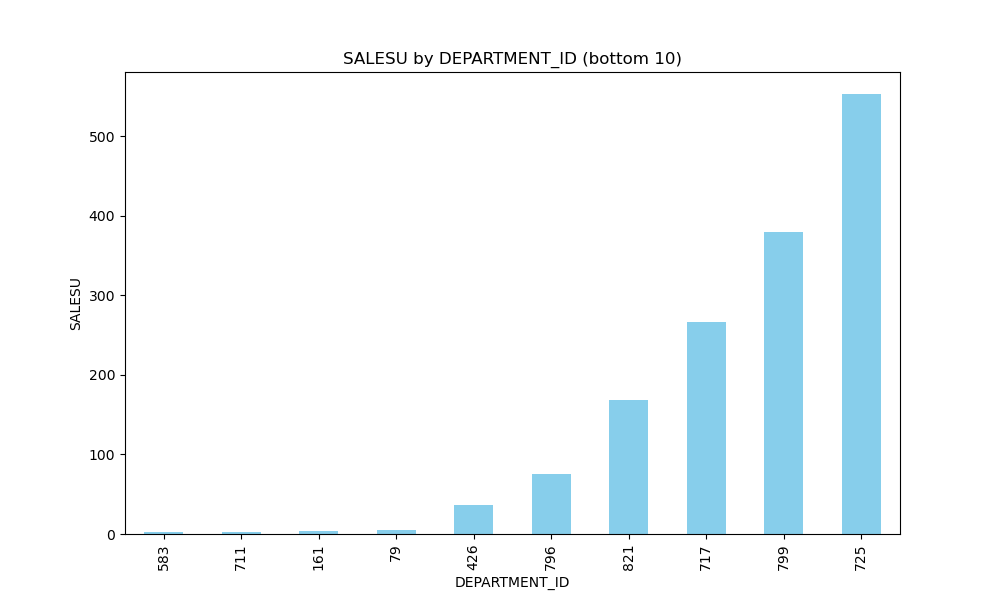

## Inventory Management

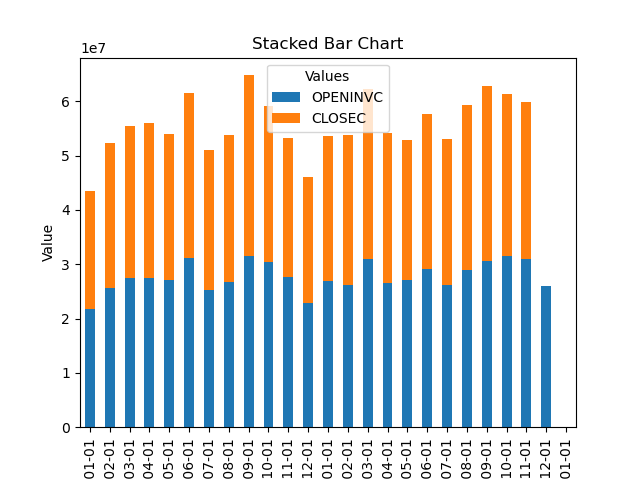

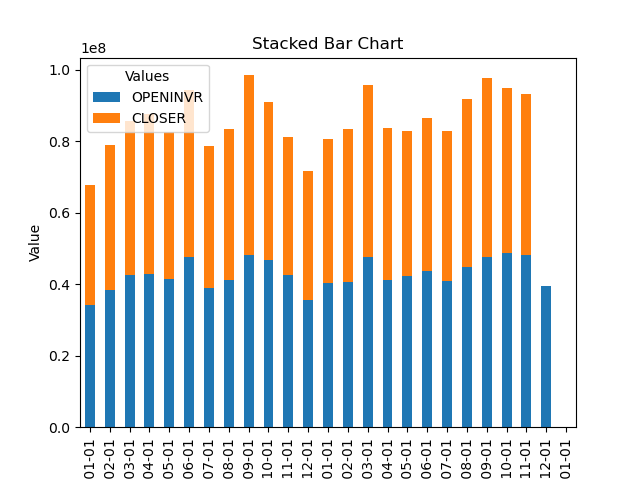

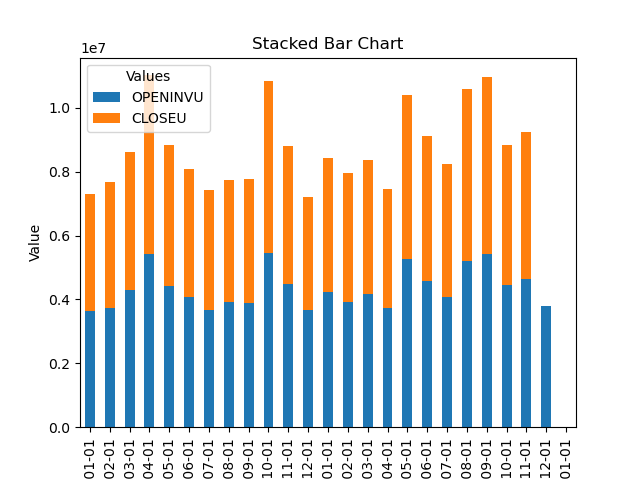

## Turnover Rate

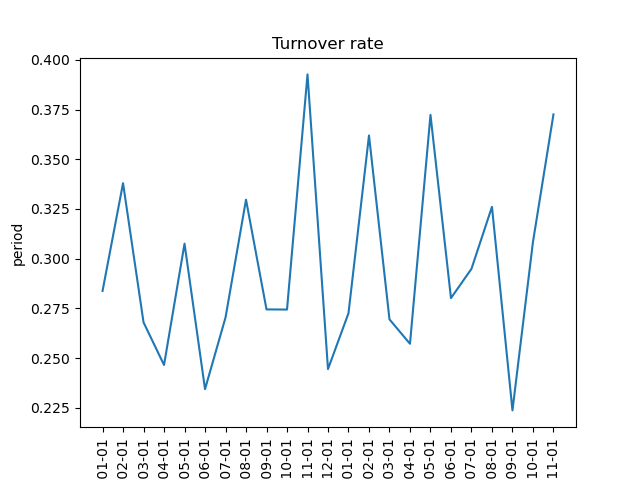

## Price Adjustment Impact

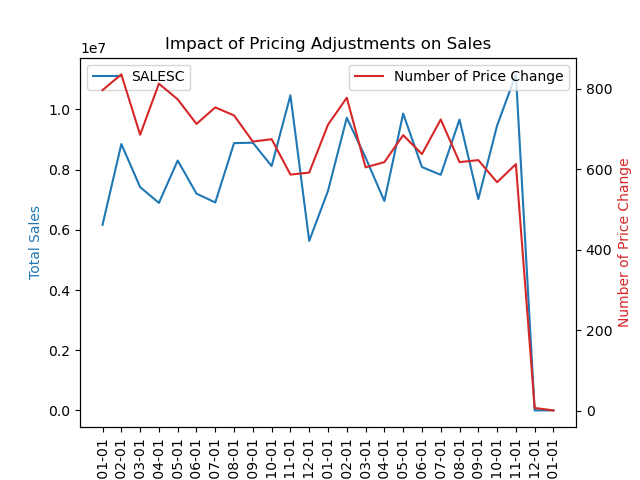

------------------------------------------------------

# Implementation Python Codes

# Import python packages

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data (We partitioned the original data to focus on 2022 to 2024.)

In [2]:
file_path = "DoD_data/KPI_2022_to_2024.csv"
df = pd.read_csv(file_path)

### Snapshot of the data

In [3]:
df

,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,FISCAL_PERIOD_DATE,LOCATION_SKEY,OPENINVC,OPENINVR,OPENINVU,CLOSEC,CLOSER,CLOSEU,...,XFERR,XFERU,MARKDOWN,MARKUP,POSMARKD,MD,DEPARTMENT_ID,SHRINKPA,SHRINKSA,SHRINKPROV
0,2022,1,2022-01-01,6216,1.18,0.92,1.0,25.44,21.58,20.0,...,0.00,0,0.0,0.0,0.00,0.00,834,0.0,0.0,0.05
1,2022,1,2022-01-01,6200,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0,0.0,0.0,0.00,0.00,811,0.0,0.0,0.00
2,2022,1,2022-01-01,6237,0.00,0.00,0.0,3.76,4.97,3.0,...,0.00,0,0.0,0.0,0.00,0.00,834,0.0,0.0,0.10
3,2022,1,2022-01-01,6223,21913.31,27375.73,18529.0,14369.56,16970.51,13180.0,...,1477.96,4440,0.0,16.7,310.37,293.67,28,0.0,0.0,191.82
4,2022,1,2022-01-01,6271,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0,0.0,0.0,0.00,0.00,499,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125524,2023,12,2023-12-01,6274,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0,0.0,0.0,0.00,0.00,637,0.0,0.0,0.00
125525,2023,12,2023-12-01,6225,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0,0.0,0.0,0.00,0.00,515,0.0,0.0,0.00
125526,2024,1,2024-01-01,94864,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0,0.0,0.0,0.00,0.00,973,0.0,0.0,0.00
125527,2024,1,2024-01-01,6210,0.00,0.00,0.0,0.00,0.00,0.0,...,195.84,16,0.0,0.0,0.00,0.00,360,0.0,0.0,0.00


# Data description

### Number of rows and columns

In [4]:
df.shape

(125529, 27)

### Column names

In [5]:
df.columns

Index(['MERCHANDISING_YEAR', 'MERCHANDISING_PERIOD', 'FISCAL_PERIOD_DATE',
       'LOCATION_SKEY', 'OPENINVC', 'OPENINVR', 'OPENINVU', 'CLOSEC', 'CLOSER',
       'CLOSEU', 'RECEIPTC', 'RECEIPTR', 'RECEIPTU', 'SALESC', 'SALESR',
       'SALESU', 'XFERC', 'XFERR', 'XFERU', 'MARKDOWN', 'MARKUP', 'POSMARKD',
       'MD', 'DEPARTMENT_ID', 'SHRINKPA', 'SHRINKSA', 'SHRINKPROV'],
      dtype='object')

### Summary statistics for non-categorical columns

In [5]:
df.describe()

,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,LOCATION_SKEY,OPENINVC,OPENINVR,OPENINVU,CLOSEC,CLOSER,CLOSEU,RECEIPTC,...,XFERR,XFERU,MARKDOWN,MARKUP,POSMARKD,MD,DEPARTMENT_ID,SHRINKPA,SHRINKSA,SHRINKPROV
count,125529.000000,125529.000000,125529.00000,1.255290e+05,1.255290e+05,125529.000000,1.255290e+05,1.255290e+05,125529.000000,1.255290e+05,...,1.255290e+05,125529.000000,125529.000000,125529.000000,125529.000000,125529.000000,125529.000000,125529.000000,1.255290e+05,125529.000000
mean,2022.506528,6.492731,17932.66552,5.305186e+03,8.170207e+03,830.195208,5.114069e+03,7.878011e+03,801.057064,1.704837e+03,...,-6.971319e+01,-1.177338,60.850363,26.354897,132.290639,166.786105,682.568012,-5.294758,4.157660e+01,20.021673
std,0.505127,3.460919,38578.27866,3.058127e+04,4.613188e+04,10045.090694,2.998408e+04,4.505313e+04,9785.957014,2.339116e+04,...,2.900343e+04,3352.794752,676.644105,1070.279287,1310.064290,1947.992570,513.695212,301.887490,1.695152e+04,114.338894
min,2022.000000,1.000000,6138.00000,-4.998492e+05,-1.016312e+06,-340547.000000,-4.998342e+05,-1.015345e+06,-340547.000000,-2.678100e+04,...,-2.420662e+06,-383784.000000,-26425.750000,-13167.650000,-53840.670000,-342227.400000,28.000000,-44382.000000,-5.978350e+04,-4.840000
25%,2022.000000,3.000000,6197.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,510.000000,0.000000,0.000000e+00,0.000000
50%,2023.000000,6.000000,6250.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,636.000000,0.000000,0.000000e+00,0.000000
75%,2023.000000,10.000000,6303.00000,1.579800e+02,2.477500e+02,30.000000,1.040800e+02,1.617600e+02,20.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,852.000000,0.000000,0.000000e+00,0.000000
max,2024.000000,12.000000,152397.00000,1.919772e+06,3.166673e+06,859716.000000,1.393764e+06,2.315081e+06,863294.000000,4.280523e+06,...,5.783317e+05,53858.000000,51155.100000,342227.400000,86701.010000,103292.010000,8516.000000,23784.250000,5.980992e+06,5823.760000


# Dashboard visualization mockup

## Sales Trend Over Time

#### Data: KPI

#### Features: SALESC, SALESR, SALESU, MERCHANDISING_YEAR, FISCAL_PERIOD_DATE 

### Snapshot of the columns related to sales

In [44]:
df[['SALESC', 'SALESR', 'SALESU']].head(10)

,SALESC,SALESR,SALESU
0,6.40,5.45,5
1,0.00,0.00,0
2,7.68,10.14,6
3,15771.97,19182.57,13701
4,0.00,0.00,0
5,129.04,232.48,32
6,0.00,0.00,0
7,0.00,0.00,0
8,30.15,68.91,12
9,0.00,0.00,0


In [14]:
feature = 'SALESC'

In [16]:
feature = 'SALESR'

In [18]:
feature = 'SALESU'

In [11]:
cat = "FISCAL_PERIOD_DATE"

### Sales trend plot

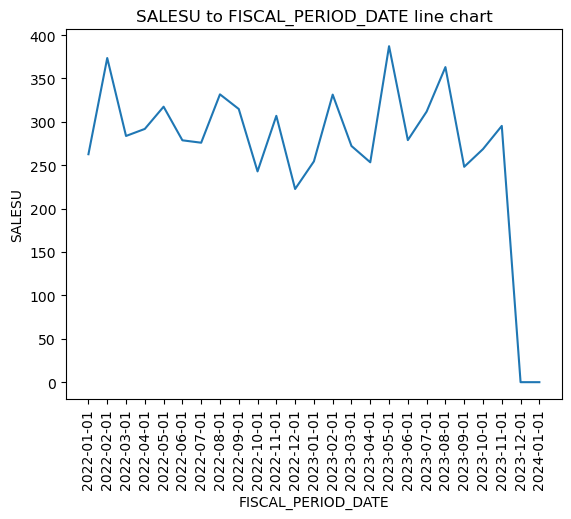

In [19]:
# Plot the line chart
plt.plot(df.groupby(cat)[feature].mean())

# Add title and labels
plt.title(feature + ' to ' + cat + ' line chart')
plt.xlabel(cat)
plt.ylabel(feature)
plt.xticks(rotation='vertical')

plt.savefig('Sales Unit.png')

# Show the plot
plt.show()

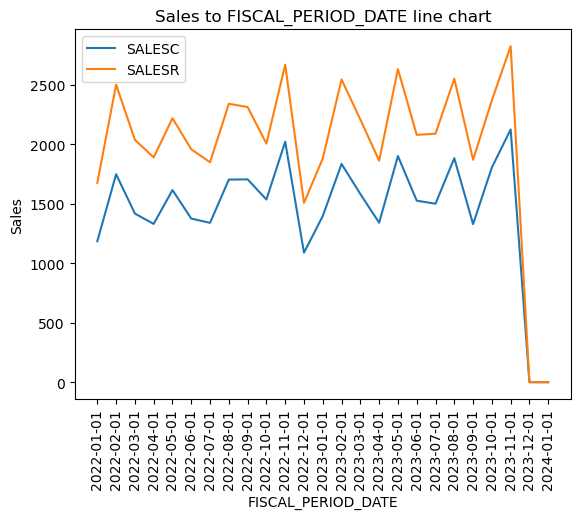

In [20]:
# Plot the line chart
plt.plot(df.groupby(cat)['SALESC'].mean(), label='SALESC')
plt.plot(df.groupby(cat)['SALESR'].mean(), label='SALESR')

# Add title and labels
plt.title('Sales to ' + cat + ' line chart')
plt.xlabel(cat)
plt.ylabel("Sales")
plt.xticks(rotation='vertical')
plt.legend()

plt.savefig('Sales Cost and Rev.png')

# Show the plot
plt.show()

## Sales by Location

#### Dataset: KPI

#### Features: LOCATION_SKEY, DEPARTMENT_ID, SALESC, SALESR, SALESU

In [38]:
feature = 'SALESC'

In [44]:
feature = 'SALESR'

In [49]:
feature = 'SALESU'

In [22]:
cat = 'LOCATION_SKEY'

In [39]:
cat = 'DEPARTMENT_ID'

In [50]:
grouped_df = df.groupby(cat)[feature].sum()

#### Drop locations whose sales attributes are zero

In [51]:
data = grouped_df[grouped_df!=0]

#### Extract top 10 stores and bottom 10 locations and department

In [52]:
sorted_data = data.sort_values()

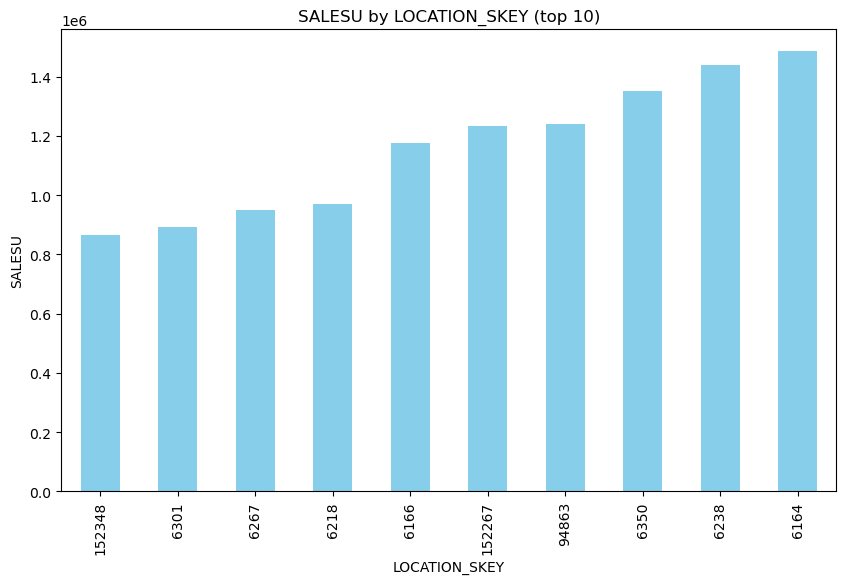

In [37]:
plt.figure(figsize=(10, 6))
sorted_data[-10:].plot(kind='bar', color='skyblue')
plt.xlabel(cat)
plt.ylabel(feature)
plt.title(feature + ' by ' + cat + ' (top 10)')
plt.xticks(rotation='vertical')
plt.savefig('Sales Unit Location.png')

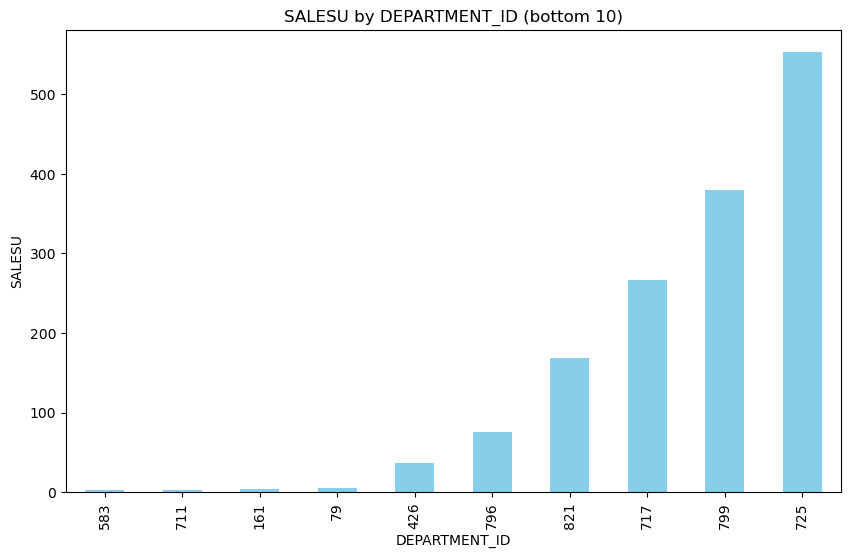

In [53]:
plt.figure(figsize=(10, 6))
sorted_data[:10].plot(kind='bar', color='skyblue')
plt.xlabel(cat)
plt.ylabel(feature)
plt.title(feature + ' by ' + cat + ' (bottom 10)')
plt.xticks(rotation='vertical')
plt.savefig('Sales Unit Dept.png')

## Opening vs. Closing Inventory

#### data: KPI

#### features: OPENINVC, OPENINVR, OPENINVU, CLOSEC, CLOSER, CLOSEU, FISCAL_PERIOD_DATE

In [54]:
feature_1, feature_2, cat = 'OPENINVC', 'CLOSEC', 'FISCAL_PERIOD_DATE'

In [58]:
feature_1, feature_2, cat = 'OPENINVR', 'CLOSER', 'FISCAL_PERIOD_DATE'

In [62]:
feature_1, feature_2, cat = 'OPENINVU', 'CLOSEU', 'FISCAL_PERIOD_DATE'

In [63]:
data = df[[feature_1, feature_2, cat]]

In [64]:
grouped_df = data.groupby(cat).sum()

<Figure size 1000x600 with 0 Axes>

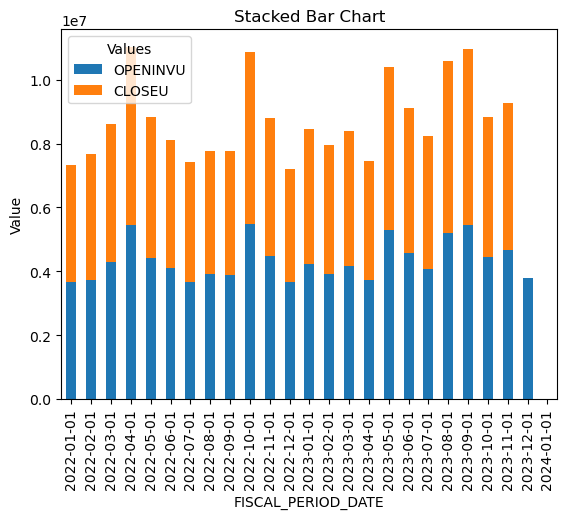

In [65]:
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar', stacked=True)
plt.xlabel(cat)
plt.ylabel("Value")
plt.title('Stacked Bar Chart')
rotation='vertical'  # Rotate x-axis labels if needed
plt.legend(title='Values')  # Add legend with title
plt.savefig('Inv Unit.png')
plt.show()

## Inventory Receipts and Returns

#### data: KPI

#### features: OPENINVC, CLOSEC, SALESC, FISCAL_PERIOD_DATE

In [66]:
data = df[['OPENINVC', 'CLOSEC', 'SALESC', 'FISCAL_PERIOD_DATE']]

In [67]:
grouped_df = data.groupby(cat).sum()

#### Drop the last two periods due to zero values

In [68]:
grouped_df = grouped_df[:-2]

In [69]:
grouped_df['AVG_INV'] = (grouped_df['OPENINVC'] + grouped_df['CLOSEC'])/2

In [70]:
grouped_df['TURNOVER_RATE'] = grouped_df['SALESC'] / grouped_df['AVG_INV']

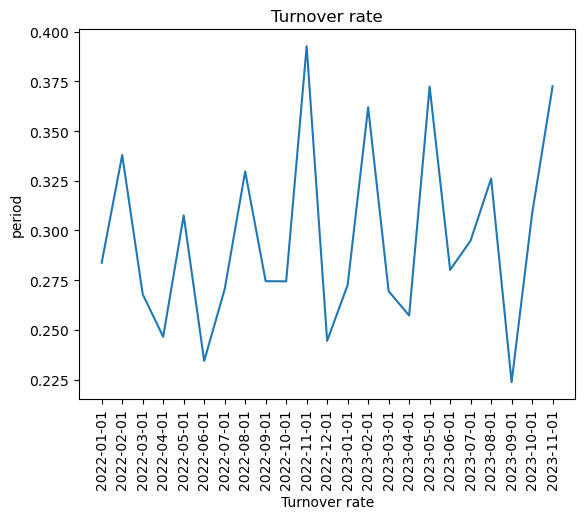

In [71]:
plt.plot(grouped_df['TURNOVER_RATE'])

# Add title and labels
plt.title('Turnover rate')
plt.xlabel('Turnover rate')
plt.ylabel("period")
plt.xticks(rotation='vertical')

plt.savefig('Turn over.png')

# Show the plot
plt.show()

## Impact of Pricing Adjustment on Sales

#### data: KPI

Features: MARKDOWN, MARKUP, POSMARKD, MD, FISCAL_PERIOD_DATE, SALESC

In [72]:
data = df[['MARKDOWN', 'MARKUP', 'POSMARKD', 'MD', 'SALESC', 'FISCAL_PERIOD_DATE']]

In [73]:
data['COUNT_MARK'] = (data['MARKDOWN'] != 0) | (df['MARKUP'] != 0)
data['COUNT_MARK'] = data['COUNT_MARK'].astype(int)

/var/folders/lb/vv79n0s57yzd8ks6lk4lnp9w0000gn/T/ipykernel_54121/1734660132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COUNT_MARK'] = (data['MARKDOWN'] != 0) | (df['MARKUP'] != 0)
/var/folders/lb/vv79n0s57yzd8ks6lk4lnp9w0000gn/T/ipykernel_54121/1734660132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['COUNT_MARK'] = data['COUNT_MARK'].astype(int)


In [74]:
grouped_df = data.groupby('FISCAL_PERIOD_DATE').sum()

### Data snapshot

In [133]:
grouped_df

,MARKDOWN,MARKUP,POSMARKD,MD,SALESC,COUNT_MARK
FISCAL_PERIOD_DATE,,,,,,
2022-01-01,270816.64,188185.00,342711.47,425343.11,6167692.30,797
2022-02-01,228246.58,211915.63,366062.31,382393.26,8852171.36,836
2022-03-01,186539.05,141470.81,460601.18,505669.42,7422253.35,686
2022-04-01,203924.57,287687.18,493621.13,409858.52,6895631.65,813
2022-05-01,180301.04,188150.19,735237.51,727388.36,8303888.01,774
2022-06-01,334733.75,191982.38,409797.31,552548.68,7204093.67,713
2022-07-01,404632.95,150814.51,491255.00,745073.44,6910725.08,754
2022-08-01,474976.34,139039.57,718932.35,1054869.12,8882814.73,734
2022-09-01,556995.57,66678.09,646339.12,1136656.60,8896409.87,669


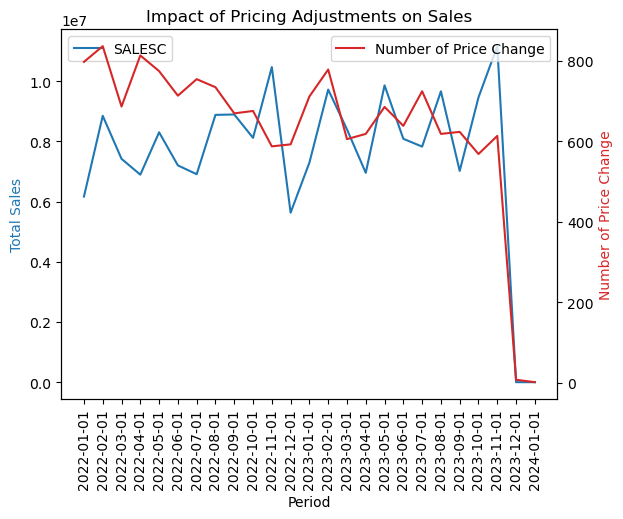

In [75]:
# Create a figure and axis object
fig, ax1 = plt.subplots()

# Plot data for the first y-axis (left)
ax1.plot(grouped_df['SALESC'], color='tab:blue', label='SALESC')
ax1.set_xlabel('Period')
ax1.set_ylabel('Total Sales', color='tab:blue')
plt.xticks(rotation='vertical')
plt.legend()

# Create a second y-axis (right) and plot data
ax2 = ax1.twinx()
ax2.plot(grouped_df['COUNT_MARK'], color='tab:red', label='Number of Price Change')
ax2.set_ylabel('Number of Price Change', color='tab:red')

# Add title
plt.title('Impact of Pricing Adjustments on Sales')
plt.legend()
plt.xticks(rotation='vertical')

plt.savefig('Price.png')

# Show plot
plt.show()